referencia: 
https://www.kaggle.com/andreshg/timeseries-analysis-a-complete-guide
https://support.sisense.com/kb/en/article/visualizing-forecasting-data-prophet-in-plotly-%E2%80%94-python

In [143]:
# importar os pacotes necessários
import pandas as pd
import plotly.express as px


#importar o arquivo csv do meu repositório público no github 
dataset='https://raw.githubusercontent.com/maiaufrrj/superstore_data/main/superstore_dataset2011-2015.csv'
df = pd.read_csv(dataset, encoding= 'unicode_escape')

# visualizar início dos dados
df.head()

Row ID         Order ID Order Date  ...   Profit Shipping Cost Order Priority
0   42433     AG-2011-2040   1/1/2011  ...  106.140         35.46         Medium
1   22253    IN-2011-47883   1/1/2011  ...   36.036          9.72         Medium
2   48883     HU-2011-1220   1/1/2011  ...   29.640          8.17           High
3   11731  IT-2011-3647632   1/1/2011  ...  -26.055          4.82           High
4   22255    IN-2011-47883   1/1/2011  ...   37.770          4.70         Medium

[5 rows x 24 columns]

In [144]:
#criando dicionário para entender cada recurso disponível e posteriormente modificar dataframe

columns = {'Row ID':'id_linha',
           'Order ID': 'id_pedido', 
           'Order Date': 'data_pedido',
           'Ship Date': 'data_envio',
           'Ship Mode': 'modalidade_frete',
           'Customer ID': 'id_cliente',
           'Customer Name': 'cliente',
           'Segment': 'segmento',
           'City': 'cidade',
           'State': 'estado',
           'Country': 'país',
           'Postal Code': 'cod_postal',
           'Market': 'mercado',
           'Region': 'regiao',
           'Product ID': 'id_produto',
           'Category': 'categoria_produto',
           'Sub-Category': 'subcategoria_produto',
           'Product Name': 'produto',
           'Sales': 'vendas',
           'Quantity': 'quantidade',
           'Discount': 'desconto',
           'Profit': 'lucro',
           'Shipping Cost': 'custo_envio',
           'Order Priority': 'prioridade'
           }
#trocando nomes das colunas e selecionando coluna de índice
df=df.rename(columns=columns).set_index('id_pedido')      

In [145]:
df.head()

id_linha data_pedido  ... custo_envio prioridade
id_pedido                              ...                       
AG-2011-2040        42433    1/1/2011  ...       35.46     Medium
IN-2011-47883       22253    1/1/2011  ...        9.72     Medium
HU-2011-1220        48883    1/1/2011  ...        8.17       High
IT-2011-3647632     11731    1/1/2011  ...        4.82       High
IN-2011-47883       22255    1/1/2011  ...        4.70     Medium

[5 rows x 23 columns]

In [146]:
fig1 = px.histogram(df, x='mercado', y='vendas', histfunc='sum').update_xaxes(categoryorder='total descending')
fig1.show()

In [147]:
fig2 = px.histogram(df, x='mercado', y="custo_envio", histfunc='sum').update_xaxes(categoryorder='total descending')
fig2.show()

In [148]:
#verificando os 20 países que somaram as maiores vendas
topVendas_20_paises = df.groupby(['país']).agg({'vendas':sum})
topVendas_20_paises.sort_values(by='vendas', ascending=False, inplace=True)
topVendas_20_paises.style.format("{:.1f}")
topVendas_20_paises = topVendas_20_paises[:20]

fig2 = px.histogram(topVendas_20_paises, x=topVendas_20_paises.index, y='vendas', histfunc='sum').update_xaxes(categoryorder='total descending')
fig2.show()

In [149]:
#verificando os 20 países que somaram os maiores lucros
topLucro_20_paises = df.groupby(['país']).agg({'lucro':sum})
topLucro_20_paises.sort_values(by='lucro', ascending=False, inplace=True)
topLucro_20_paises.style.format("{:.1f}")
topLucro_20_paises = topLucro_20_paises[:20]

fig3 = px.histogram(topLucro_20_paises, x=topLucro_20_paises.index, y='lucro', histfunc='sum').update_xaxes(categoryorder='total descending')
fig3.show()

In [150]:
#verificando os 20 países que somaram os menores lucros
bottomLucro_20_paises = df.groupby(['país']).agg({'lucro':sum})
bottomLucro_20_paises.sort_values(by='lucro', ascending=True, inplace=True)
bottomLucro_20_paises.style.format("{:.1f}")
bottomLucro_20_paises = bottomLucro_20_paises[:20]

fig3 = px.histogram(bottomLucro_20_paises, x=bottomLucro_20_paises.index, y='lucro', histfunc='sum').update_xaxes(categoryorder='total ascending')
fig3.show()

In [151]:
import plotly.io as pio
aggs = ["count","sum","avg","median","mode","rms","stddev","min","max","first","last"]

agg = []
agg_func = []
for i in range(0, len(aggs)):
    agg = dict(
        args=['transforms[0].aggregations[0].func', aggs[i]],
        label=aggs[i],
        method='restyle'
    )
    agg_func.append(agg)

data = [dict(
  type = 'choropleth',
  locationmode = 'country names',
  locations = df['país'],
  z = df['lucro'],
  autocolorscale = False,
  colorscale = 'Portland',
  reversescale = False,
  transforms = [dict(
    type = 'aggregate',
    groups = df['país'],
    aggregations = [dict(
        target = 'z', func = 'sum', enabled = True)
    ]
  )]
)]

layout = dict(
  title = '<b>Agregação de Lucro</b><br>escolha o tipo de agregação',
  xaxis = dict(title = 'Subject'),
  yaxis = dict(title = 'Score', range = [0,22]),
  height = 600,
  width = 900,
  updatemenus = [dict(
        x = 0.85,
        y = 1.15,
        xref = 'paper',
        yref = 'paper',
        yanchor = 'top',
        active = 1,
        showactive = False,
        buttons = agg_func
  )]
)

fig_dict = dict(data=data, layout=layout)

pio.show(fig_dict, validate=False)

In [152]:
#categorias de produto que promoveram maiores fontes de lucro
fig4 = px.histogram(df, x='categoria_produto', y='lucro', histfunc='sum').update_xaxes(categoryorder='total descending')
fig4.show()

In [153]:
fig5 = px.scatter(df, x='custo_envio', y='vendas', color='mercado')
fig5.show()

In [154]:
fig6 = px.scatter(df, x='custo_envio', y='desconto',color='mercado')
fig6.show()

In [155]:
#criar dataset resumido em vendas mensais
df2=df
df2.index = pd.to_datetime(df2['data_pedido'])

df2['mes_ano'] = pd.to_datetime(df2['data_pedido']).apply(lambda x: '{month}-{year}'.format(month=x.month, year=x.year))

df_vendas = df2.groupby('mes_ano')['vendas'].sum()
df_vendas.to_frame()

df_vendas = pd.DataFrame({'mes_ano':df_vendas.index, 'vendas':df_vendas.values})
df_vendas['ano'] = pd.DatetimeIndex(df_vendas['mes_ano']).year
df_vendas['mes'] = pd.DatetimeIndex(df_vendas['mes_ano']).month

df_vendas = df_vendas.sort_values(['ano', 'mes'], ascending = (True, True))
df_vendas.set_index('mes_ano')
#df_vendas.head(50)

vendas   ano  mes
mes_ano                         
1-2011   138241.30042  2011    1
2-2011   134969.94086  2011    2
3-2011   171455.59372  2011    3
4-2011   128833.47034  2011    4
5-2011   148146.72092  2011    5
6-2011   189338.43966  2011    6
7-2011   162034.69756  2011    7
8-2011   219223.49524  2011    8
9-2011   255237.89698  2011    9
10-2011  204675.07846  2011   10
11-2011  214934.29386  2011   11
12-2011  292359.96752  2011   12
1-2012   162800.89338  2012    1
2-2012   152661.15144  2012    2
3-2012   201608.72784  2012    3
4-2012   187469.96192  2012    4
5-2012   218960.16042  2012    5
6-2012   249289.77172  2012    6
7-2012   174394.02808  2012    7
8-2012   271669.66086  2012    8
9-2012   256567.85308  2012    9
10-2012  239321.09904  2012   10
11-2012  270723.05356  2012   11
12-2012  291972.33306  2012   12
1-2013   206459.19582  2013    1
2-2013   191062.77216  2013    2
3-2013   230547.79468  2013    3
4-2013   233181.34844  2013    4
5-2013   304509.96336  2013    5
6-2013   341162.34370  2013    6
7-2013   223642.65664  2013    7
8-2013   323876.60716  2013    8
9-2013   326897.27044  2013    9
10-2013  270121.87570  2013   10
11-2013  383039.21248  2013   11
12-2013  371245.40880  2013   12
1-2014   268265.52240  2014    1
2-2014   244159.30486  2014    2
3-2014   347720.96868  2014    3
4-2014   302132.54000  2014    4
5-2014   304798.83604  2014    5
6-2014   372577.23298  2014    6
7-2014   278672.17326  2014    7
8-2014   432731.04194  2014    8
9-2014   405436.70584  2014    9
10-2014  406659.41500  2014   10
11-2014  508954.73156  2014   11
12-2014  427757.39800  2014   12

In [156]:
#gráfico para visualizar evolução de vendas
fig = px.bar(df_vendas, x='mes_ano', y="vendas")
fig.show()

In [157]:
#criar dataset resumido em vendas mensais
df3=df
df3.index = pd.to_datetime(df3['data_pedido'])

df3['mes_ano'] = pd.to_datetime(df3['data_pedido']).apply(lambda x: '{month}-{year}'.format(month=x.month, year=x.year))

df_lucro = df3.groupby('mes_ano')['lucro'].sum()
df_lucro.to_frame()

df_lucro = pd.DataFrame({'mes_ano':df_lucro.index, 'lucro':df_lucro.values})
df_lucro['ano'] = pd.DatetimeIndex(df_lucro['mes_ano']).year
df_lucro['mes'] = pd.DatetimeIndex(df_lucro['mes_ano']).month

df_lucro = df_lucro.sort_values(['ano', 'mes'], ascending = (True, True))
df_lucro.set_index('mes_ano')
#df_vendas.head(50)

lucro   ano  mes
mes_ano                        
1-2011   13457.23302  2011    1
2-2011   17588.83726  2011    2
3-2011   16169.36062  2011    3
4-2011   13405.46924  2011    4
5-2011   14777.45792  2011    5
6-2011   25932.87796  2011    6
7-2011   10631.84406  2011    7
8-2011   19650.67124  2011    8
9-2011   32313.25458  2011    9
10-2011  30745.54166  2011   10
11-2011  21261.40536  2011   11
12-2011  33006.85862  2011   12
1-2012   19627.42058  2012    1
2-2012   17828.18244  2012    2
3-2012   22752.87684  2012    3
4-2012   20804.00532  2012    4
5-2012   22865.39572  2012    5
6-2012   34358.03962  2012    6
7-2012   21725.18808  2012    7
8-2012   36511.44996  2012    8
9-2012   25039.93498  2012    9
10-2012  27773.87454  2012   10
11-2012  26160.60686  2012   11
12-2012  31968.30416  2012   12
1-2013   26052.40252  2013    1
2-2013   31553.99756  2013    2
3-2013   34873.71938  2013    3
4-2013   26008.05144  2013    4
5-2013   39053.30946  2013    5
6-2013   43298.85000  2013    6
7-2013   27019.91294  2013    7
8-2013   32977.75576  2013    8
9-2013   18850.09084  2013    9
10-2013  27871.97470  2013   10
11-2013  51720.88568  2013   11
12-2013  47654.27990  2013   12
1-2014   31447.74660  2014    1
2-2014   29454.01876  2014    2
3-2014   50097.04458  2014    3
4-2014   35709.53320  2014    4
5-2014   34335.60404  2014    5
6-2014   40869.02108  2014    6
7-2014   26450.70856  2014    7
8-2014   46443.47934  2014    8
9-2014   52533.83284  2014    9
10-2014  52342.49740  2014   10
11-2014  55561.72406  2014   11
12-2014  48920.76000  2014   12

In [158]:
#gráfico para visualizar evolução de lucro mensal
fig = px.line(df_lucro, x='mes_ano', y="lucro")
fig.show()

In [429]:
train_size = int(0.80 * len(df_vendas))
test_size = len(df_vendas) - train_size

univariate_df = df_vendas[['mes_ano', 'vendas']].copy()
univariate_df.columns = ['ds', 'y']

train = univariate_df.iloc[:train_size, :]

x_train, y_train = pd.DataFrame(univariate_df.iloc[:train_size, 0]), pd.DataFrame(univariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(univariate_df.iloc[train_size:, 0]), pd.DataFrame(univariate_df.iloc[train_size:, 1])

print(len(train), len(x_valid))

38 10


In [442]:
#https://towardsdatascience.com/time-series-prediction-using-prophet-in-python-35d65f626236
#https://towardsdatascience.com/facebook-prophet-for-time-series-forecasting-in-python-part1-d9739cc79b1d

from sklearn.metrics import mean_absolute_error, mean_squared_error
from fbprophet import Prophet
import math

# Train the model
model = Prophet()
model.fit(train)

#future= model.make_future_dataframe(periods=test_size)
#future.tail(2)

#x_valid = model.make_future_dataframe(periods=test_size, freq='w')
#future= model.make_future_dataframe(periods=12, freq='m')

future = model.make_future_dataframe(periods=6, freq='m')
future.tail(1)

# Predict on valid set
y_pred = model.predict(future)

# Calculo de métricas
score_mae = mean_absolute_error(y_valid, y_pred.tail(test_size)['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred.tail(test_size)['yhat']))

print(score_mae,score_rmse)

#print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


85753.19944774496 99382.21848444702


In [443]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(model, y_pred)

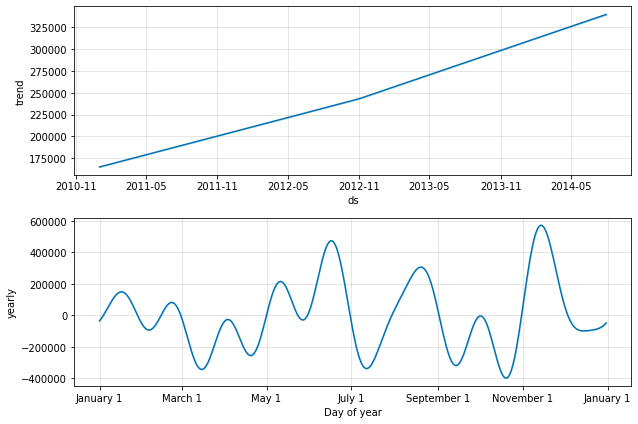

In [448]:
#forecast = y_pred
#forecast.head(100)

componente_mensal = model.plot_components(y_pred)

In [466]:
from fbprophet.diagnostics import cross_validation, performance_metrics 
df_vendas_cv = cross_validation(model, horizon='1 days') 

INFO:fbprophet:Making 25 forecasts with cutoffs between 2012-01-31 00:00:00 and 2014-01-31 00:00:00


  0%|          | 0/25 [00:00<?, ?it/s]

INFO:fbprophet:n_changepoints greater than number of observations. Using 9.
INFO:fbprophet:n_changepoints greater than number of observations. Using 10.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


SystemError: ignored

In [459]:
#https://www.youtube.com/watch?v=CW1PZwNG-wQ
relatorio_regressao = performance_metrics(df_vendas_cv)
#https://facebook.github.io/prophet/docs/diagnostics.html

In [469]:
relatorio_regressao['mape'].mean()

0.4724363639223683

MAPE: Erro Absoluto Médio Percentual

# 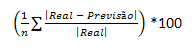

In [371]:
# Plotar previsão
#import seaborn as sns
#f, ax = plt.subplots(1)
#f.set_figheight(8)
#f.set_figwidth(30)

#model.plot(y_pred, ax=ax)

#sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='Ground truth') #navajowhite

#ax.set_title(f'Previsão de Vendas \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
#ax.set_xlabel(xlabel='Data', fontsize=14)
#ax.set_ylabel(ylabel='Vendas', fontsize=14)

#plt.show()

#gráfico para visualizar evolução de lucro mensal
#fig = px.line(df_lucro, x='mes_ano', y="lucro")
#fig.show()

In [183]:
from sklearn.preprocessing import MinMaxScaler

data = univariate_df.filter(['y'])
#Convert the dataframe to a numpy array
dataset = data.values

scaler = MinMaxScaler(feature_range=(-1, 0))
scaled_data = scaler.fit_transform(dataset)

scaled_data[:10]

array([[-0.97525045],
       [-0.98385654],
       [-0.8878723 ],
       [-1.        ],
       [-0.94919187],
       [-0.84082719],
       [-0.91265622],
       [-0.7622074 ],
       [-0.66746289],
       [-0.80048049]])

In [186]:
import numpy as np

In [296]:
# Defines the rolling window
look_back = 3
# Split into train and test sets
train, test = scaled_data[:train_size-look_back,:], scaled_data[train_size-look_back:,:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(look_back, len(dataset)):
        a = dataset[i-look_back:i, 0]
        X.append(a)
        Y.append(dataset[i, 0])
    return np.array(X), np.array(Y)

x_train, y_train = create_dataset(train, look_back)
x_test, y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

print(len(x_train), len(x_test))

34 8


In [297]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping

#Build the LSTM model
model = Sequential()
early_stop = EarlyStopping(monitor='val_loss', patience = 20)

model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dropout(0.1))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error') 

#Train the model
history = model.fit(x_train, y_train, batch_size=1, epochs=500, validation_data=(x_test, y_test), callbacks=[early_stop])

model.summary()

Epoch 1/500
34/34 [==============================] - 4s 28ms/step - loss: 0.1726 - val_loss: 0.1516
Epoch 2/500
34/34 [==============================] - 0s 4ms/step - loss: 0.0216 - val_loss: 0.0598
Epoch 3/500
34/34 [==============================] - 0s 5ms/step - loss: 0.0202 - val_loss: 0.0704
Epoch 4/500
34/34 [==============================] - 0s 5ms/step - loss: 0.0264 - val_loss: 0.0760
Epoch 5/500
34/34 [==============================] - 0s 5ms/step - loss: 0.0195 - val_loss: 0.0733
Epoch 6/500
34/34 [==============================] - 0s 5ms/step - loss: 0.0238 - val_loss: 0.0440
Epoch 7/500
34/34 [==============================] - 0s 5ms/step - loss: 0.0273 - val_loss: 0.0536
Epoch 8/500
34/34 [==============================] - 0s 5ms/step - loss: 0.0175 - val_loss: 0.0615
Epoch 9/500
34/34 [==============================] - 0s 5ms/step - loss: 0.0247 - val_loss: 0.0566
Epoch 10/500
34/34 [==============================] - 0s 5ms/step - loss: 0.0206 - val_loss: 0.0530
Epoch 11

In [298]:
# Lets predict with the model
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

# invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])

test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

# Get the root mean squared error (RMSE) and MAE
score_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:,0]))
score_mae = mean_absolute_error(y_test[0], test_predict[:,0])
#print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

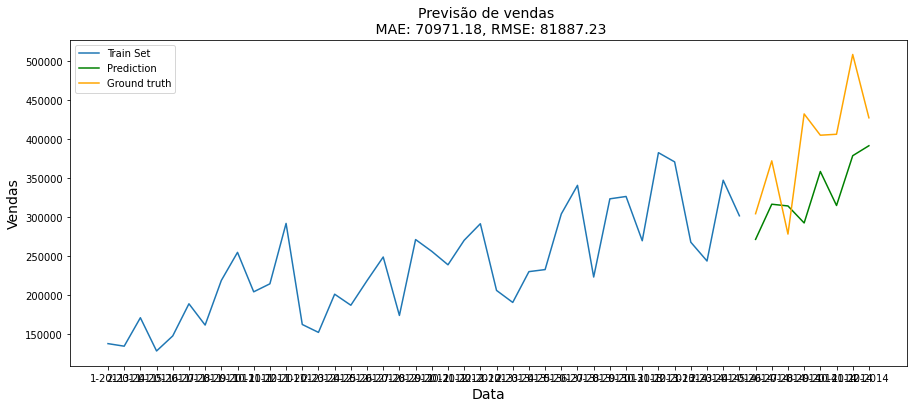

In [299]:
x_train_ticks = univariate_df.head(train_size)['ds']
y_train = univariate_df.head(train_size)['y']
x_test_ticks = univariate_df.tail(test_size)['ds']

# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

sns.lineplot(x=x_train_ticks, y=y_train, ax=ax, label='Train Set') #navajowhite
sns.lineplot(x=x_test_ticks, y=test_predict[:,0], ax=ax, color='green', label='Prediction') #navajowhite
sns.lineplot(x=x_test_ticks, y=y_test[0], ax=ax, color='orange', label='Ground truth') #navajowhite

ax.set_title(f'Previsão de vendas \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='Data', fontsize=14)
ax.set_ylabel(ylabel='Vendas', fontsize=14)

plt.show()